In [9]:
pip install xgboost

  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 04_predictive_modeling.py → What will happen?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb

In [5]:
# Load dataset
df = pd.read_csv("D:/Customer 360+ Final_Project/Dataset/Cleaned_dataset.csv")
df.head(5)

,CustomerID,Name,Age,Gender,Location,SignupDate,TotalVisits,LastVisitDate,PreferredCategory,TotalOrders,TotalRevenue,AvgOrderValue,LastPurchaseDate,SupportTickets,SatisfactionScore,Churned,RFM_Score,CustomerSegment
0,C001,Andrea Whitney,39,Female,Pune,06-18-2024,29,11-14-2024,Books,24,40154,1673.083333,11-01-2024,1,1,No,7,New
1,C002,Jackie Ferguson,20,Female,Pune,12-07-2021,64,12-10-2024,Home Decor,23,168483,7325.347826,01-24-2025,4,5,No,7,Loyal
2,C003,Christopher Martinez,24,Female,Bengaluru,12-30-2021,42,02-27-2023,Home Decor,23,193225,8401.086957,06-04-2025,4,1,No,8,Loyal
3,C004,Melissa Archer,25,Male,Chennai,03-16-2022,12,11-01-2022,Fashion,10,22188,2218.800000,08-23-2024,2,4,Yes,6,New
4,C005,Jonathon Gomez,58,Male,Delhi,02-02-2022,52,02-28-2022,Electronics,16,182247,11390.437500,02-05-2024,2,3,No,7,At Risk


In [7]:
# Encode categorical variables
le = LabelEncoder()
for col in ["Gender", "Location", "Churned"]:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

In [9]:
# ----------------------------
# Classification: Churn Prediction
# ----------------------------
X_cls = df[["Age", "Gender", "Location", "TotalVisits", "TotalOrders",
            "TotalRevenue", "AvgOrderValue", "SupportTickets",
            "SatisfactionScore", "RFM_Score"]]
y_cls = df["Churned"]

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


=== Churn Prediction Results ===


Logistic Regression:
Accuracy: 0.7
Precision: 0.5
Recall: 0.1111111111111111
ROC-AUC: 0.4920634920634921


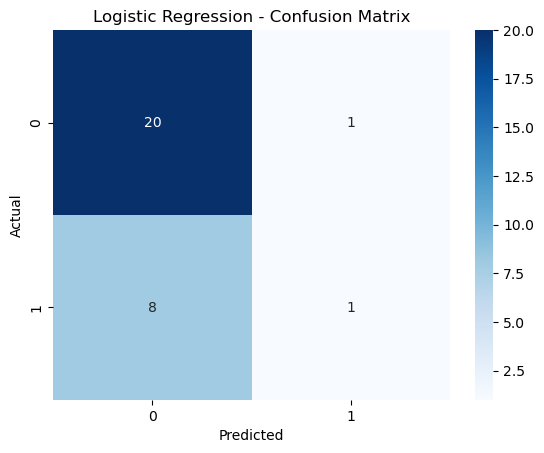


Random Forest:
Accuracy: 0.43333333333333335
Precision: 0.16666666666666666
Recall: 0.2222222222222222
ROC-AUC: 0.28306878306878314


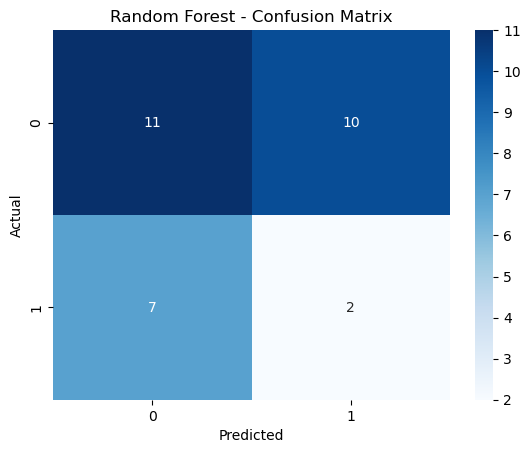

C:\Users\HP\AppData\Local\Temp\ipykernel_13184\28789365.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


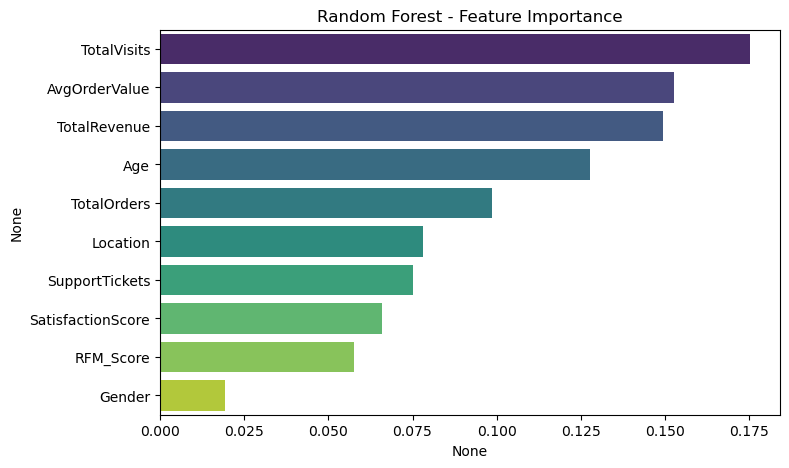

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
Accuracy: 0.26666666666666666
Precision: 0.11764705882352941
Recall: 0.2222222222222222
ROC-AUC: 0.2248677248677249


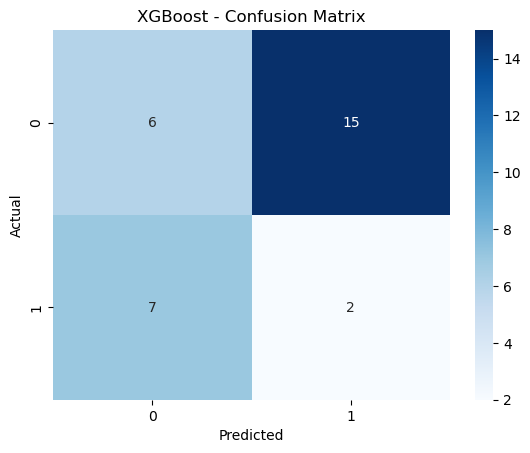

C:\Users\HP\AppData\Local\Temp\ipykernel_13184\28789365.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


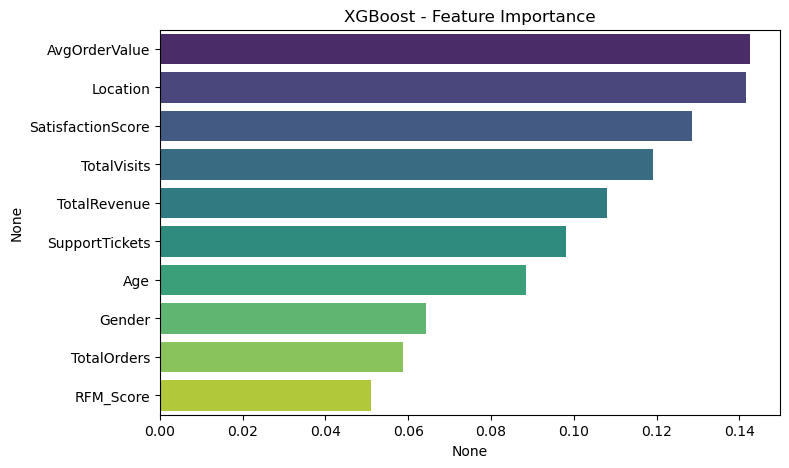

In [11]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models_cls = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
}

print("\n=== Churn Prediction Results ===\n")
for name, model in models_cls.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Feature Importance (if supported)
    if hasattr(model, "feature_importances_"):
        feat_imp = pd.Series(model.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
        plt.figure(figsize=(8,5))
        sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
        plt.title(f"{name} - Feature Importance")
        plt.show()


=== CLV Prediction Results ===


Linear Regression:
R²: 1.0
RMSE: 1.5499099107537395e-10

Random Forest Regressor:
R²: 0.9981201110863489
RMSE: 1727.3139480698535


C:\Users\HP\AppData\Local\Temp\ipykernel_13184\500766937.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="magma")


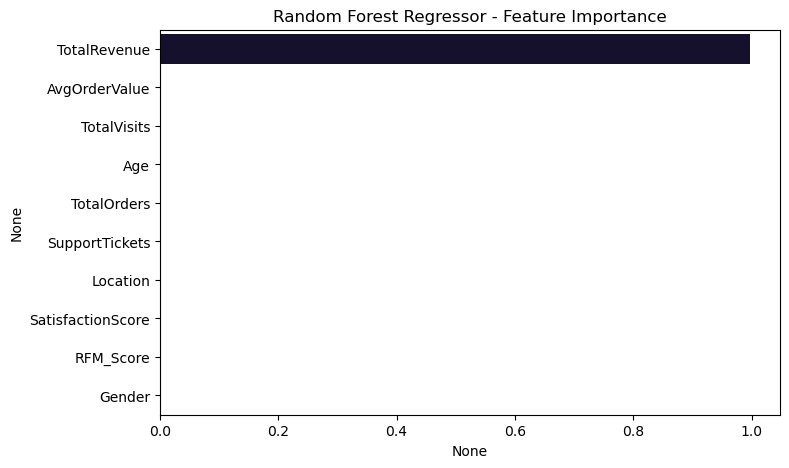

In [13]:
# ----------------------------
# Regression: CLV Prediction
# ----------------------------
X_reg = df[["Age", "Gender", "Location", "TotalVisits", "TotalOrders",
            "TotalRevenue", "AvgOrderValue", "SupportTickets",
            "SatisfactionScore", "RFM_Score"]]
y_reg = df["TotalRevenue"]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

print("\n=== CLV Prediction Results ===\n")
for name, model in models_reg.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"\n{name}:")
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

    # Feature Importance (if supported)
    if hasattr(model, "feature_importances_"):
        feat_imp = pd.Series(model.feature_importances_, index=X_reg.columns).sort_values(ascending=False)
        plt.figure(figsize=(8,5))
        sns.barplot(x=feat_imp, y=feat_imp.index, palette="magma")
        plt.title(f"{name} - Feature Importance")
        plt.show()